# LIU Ramp-Up Stability Check: No SC

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import Data

In [5]:
#Horizontal Scan No Space Charge

# Create dd dictionary
dd = dict()

dd = add_input_file(dd, '2021/output/output.mat', '2021 Standard')
dd = add_input_file(dd, '2022/output/output.mat', '2022 Standard')
dd = add_input_file(dd, '2023/output/output.mat', '2023 Standard')

	Added output data from  2021/output/output.mat 	 dictionary key:  2021 Standard
	Added output data from  2022/output/output.mat 	 dictionary key:  2022 Standard
	Added output data from  2023/output/output.mat 	 dictionary key:  2023 Standard


### Plot Parameters

In [6]:
save_folder = 'Plots/'

sc = 'NoSC'
legend_label = 'Year/Beam' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS_LIU_Ramp-Up'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 50
betagamma = 3.13154090774 * 0.947643035549 # 2GeV
#betagamma = 2.492104532 * 0.9159915293879255 # 1.4GeV

In [7]:
dd

{'2021 Standard': {'D_x': array([[3.12147915, 3.12857211, 3.12634685, ..., 3.11701612, 3.12853909,
          3.13068735]]),
  'D_y': array([[-0.00500539, -0.005391  ,  0.00494934, ..., -0.00138362,
          -0.00623883,  0.0008025 ]]),
  '__globals__': [],
  '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Jan 10 06:04:18 2020',
  '__version__': '1.0',
  'alpha_x': array([[0.03045197, 0.02676252, 0.02941704, ..., 0.02835026, 0.02759028,
          0.02998271]]),
  'alpha_y': array([[0.05595051, 0.05380017, 0.0559867 , ..., 0.05440636, 0.05536284,
          0.0543958 ]]),
  'beta_x': array([[22.45510528, 22.42528825, 22.49015701, ..., 22.40806512,
          22.48731171, 22.42741781]]),
  'beta_y': array([[11.71201673, 11.69808796, 11.71281576, ..., 11.70197832,
          11.70705657, 11.7048788 ]]),
  'bunchlength': array([[1.21561389e-07, 1.21560567e-07, 1.21559559e-07, ...,
          1.20044878e-07, 1.20059670e-07, 1.20074487e-07]]),
  'cumulative_time': array([[1.7

In [8]:
dd['2022 Standard'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

2021 Standard Average  sig_x  =  5.396  range =  0.0816  =  1.512 %
2022 Standard Average  sig_x  =  6.024  range =  0.1616  =  2.683 %
2023 Standard Average  sig_x  =  6.542  range =  0.2451  =  3.747 %


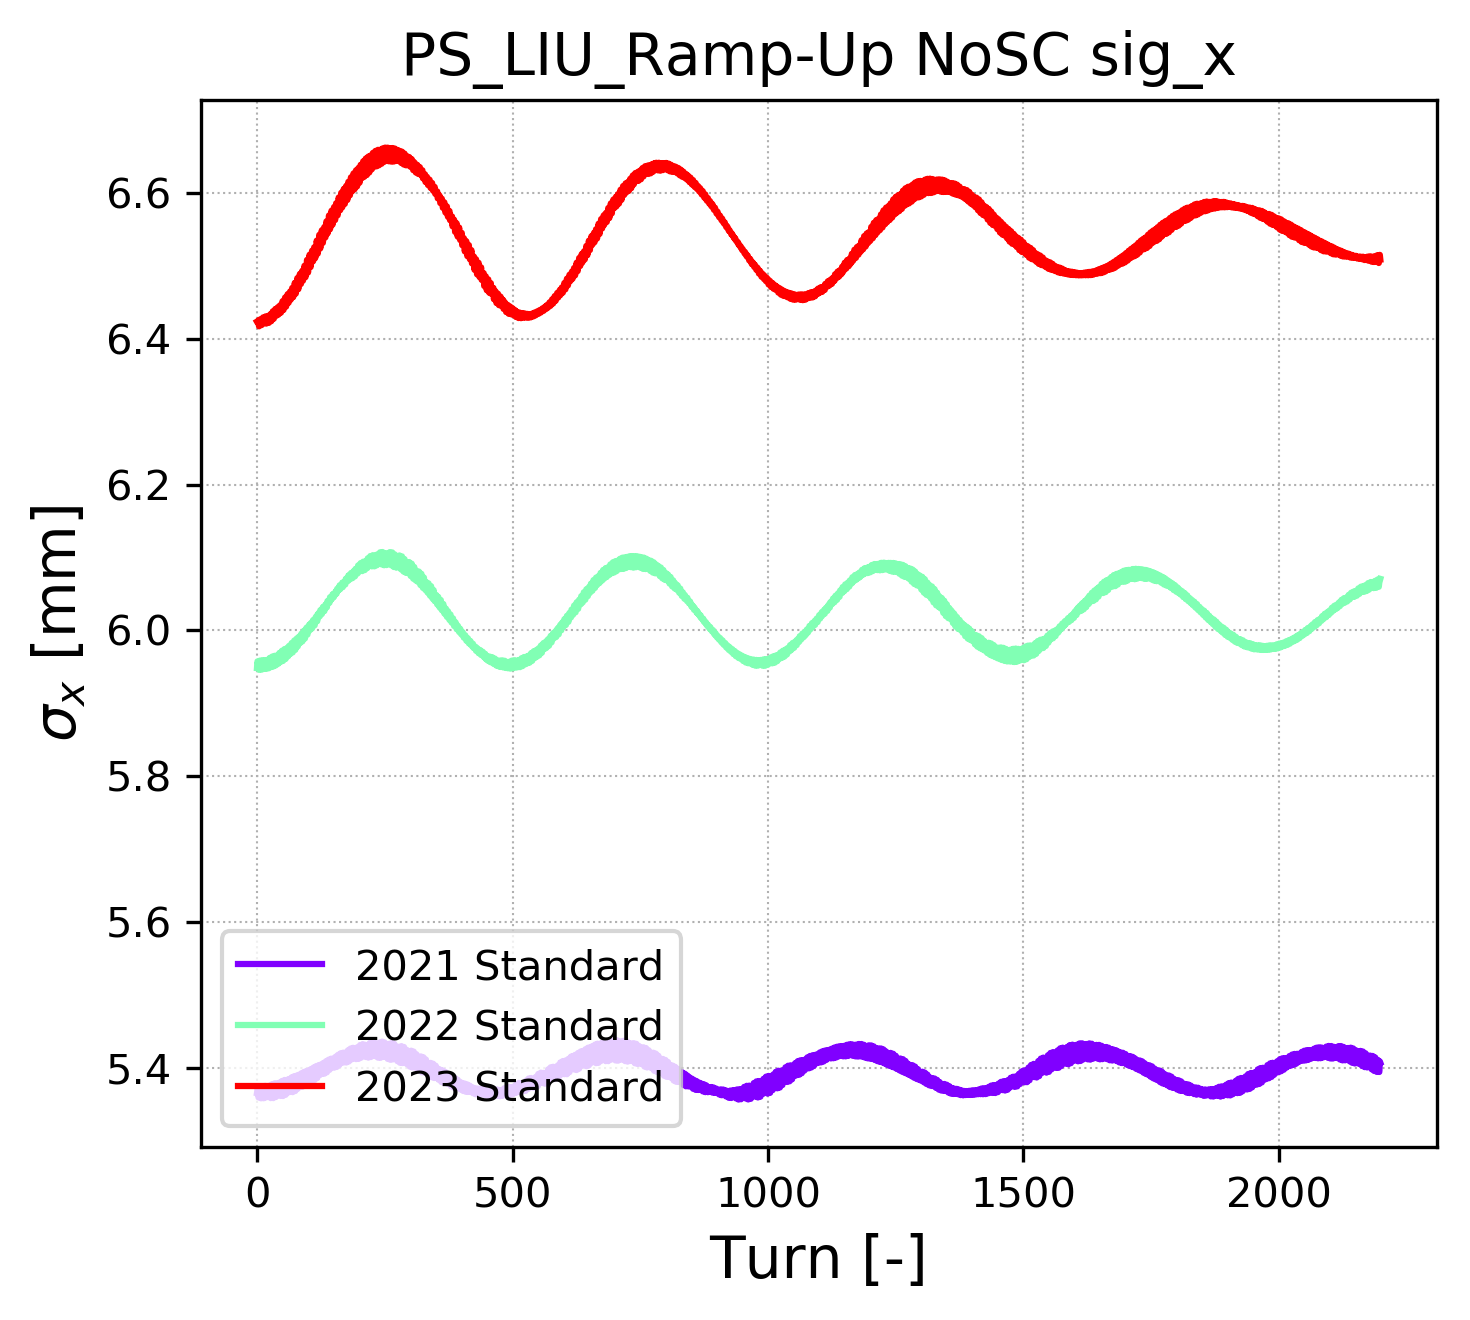

In [9]:
parameter = 'sig_x'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    av_ = np.mean((dd[key][parameter][0])*1000)
    rang_ = np.abs(np.max((dd[key][parameter][0])*1000) - np.min((dd[key][parameter][0])*1000))
    print key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

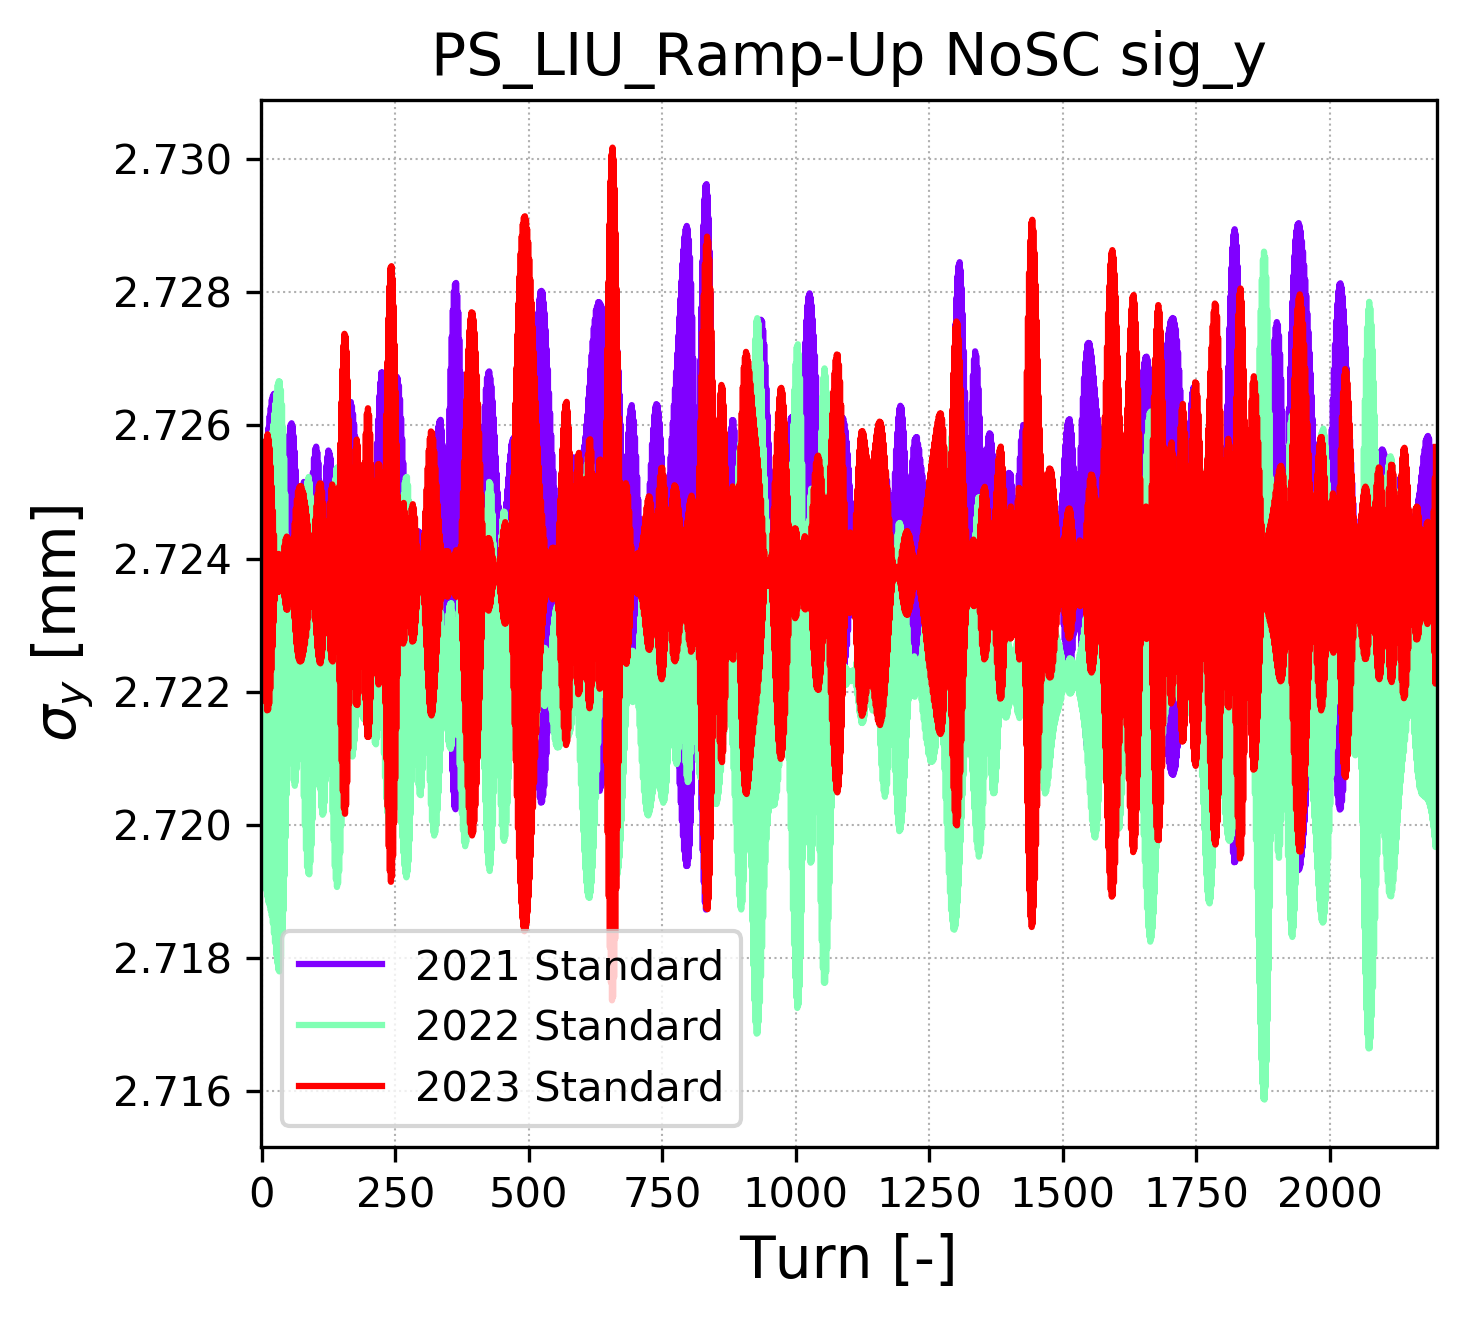

In [20]:
parameter = 'sig_y'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

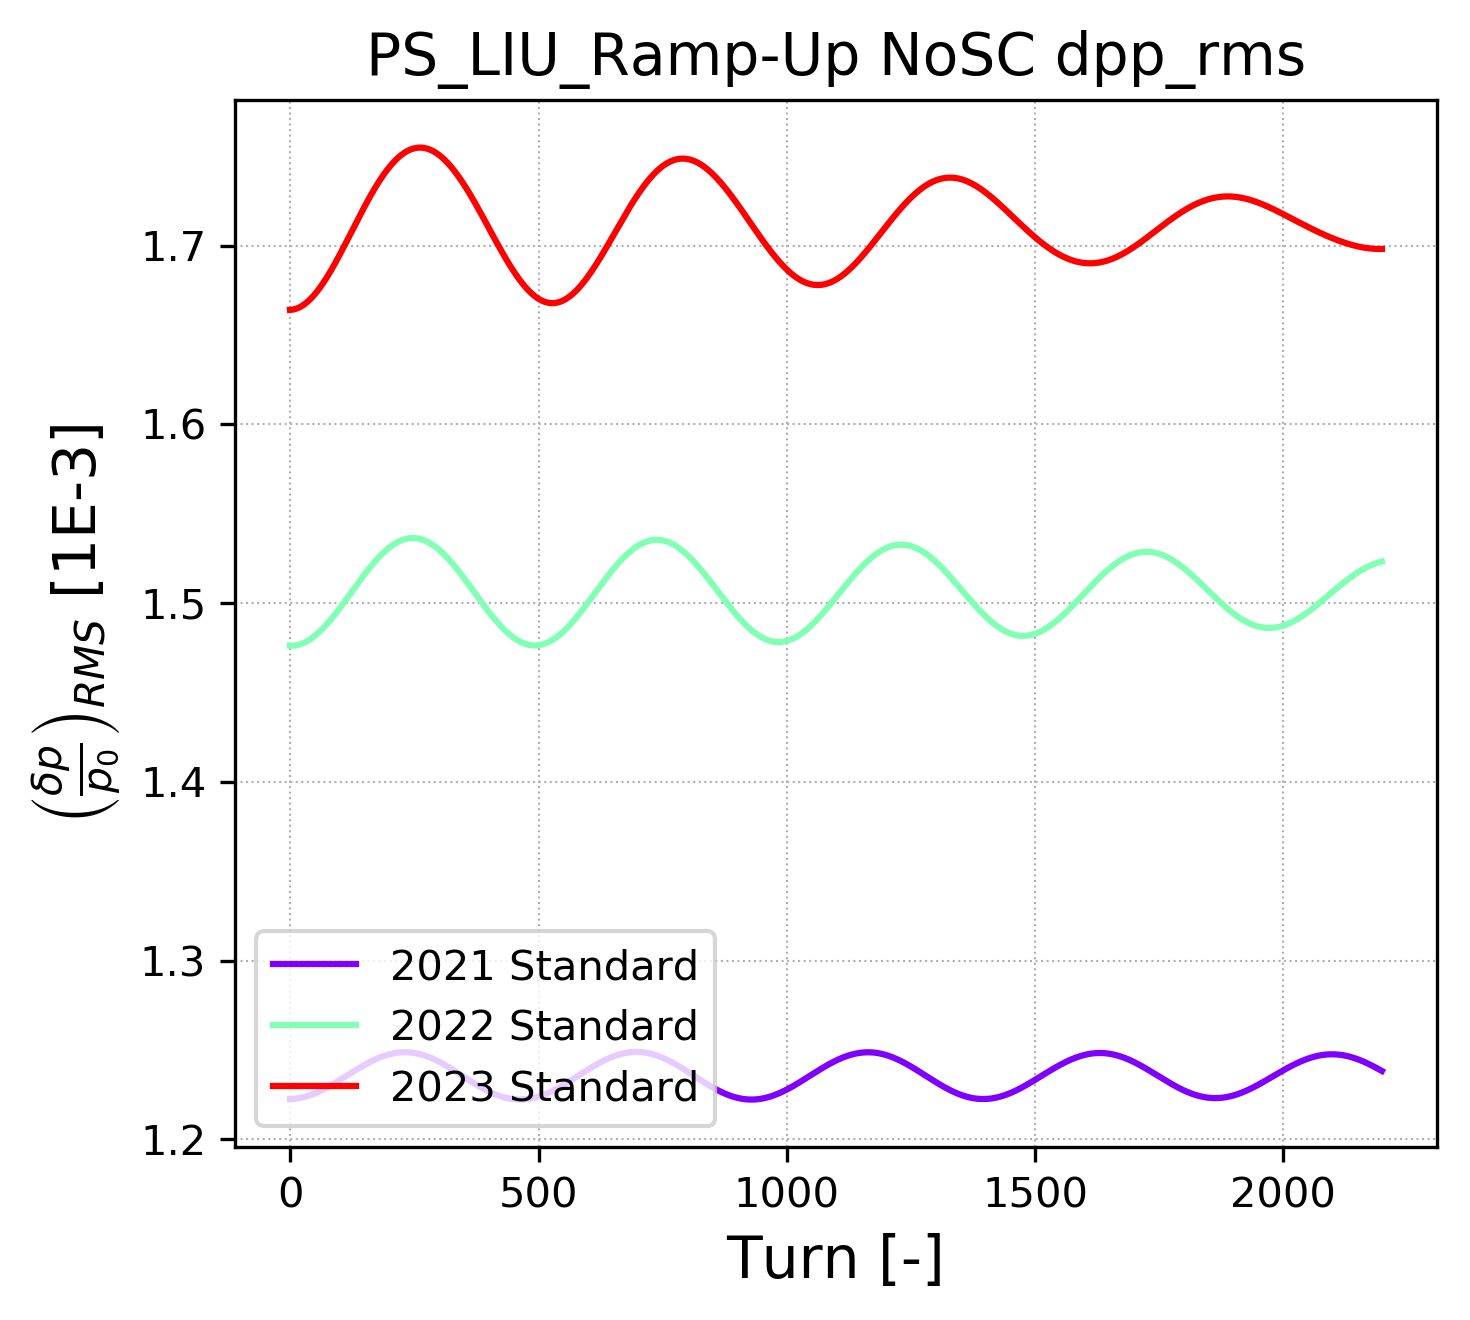

In [11]:
parameter = 'dpp_rms'
multi = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\left(\frac{\delta p}{p_0}\right)_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

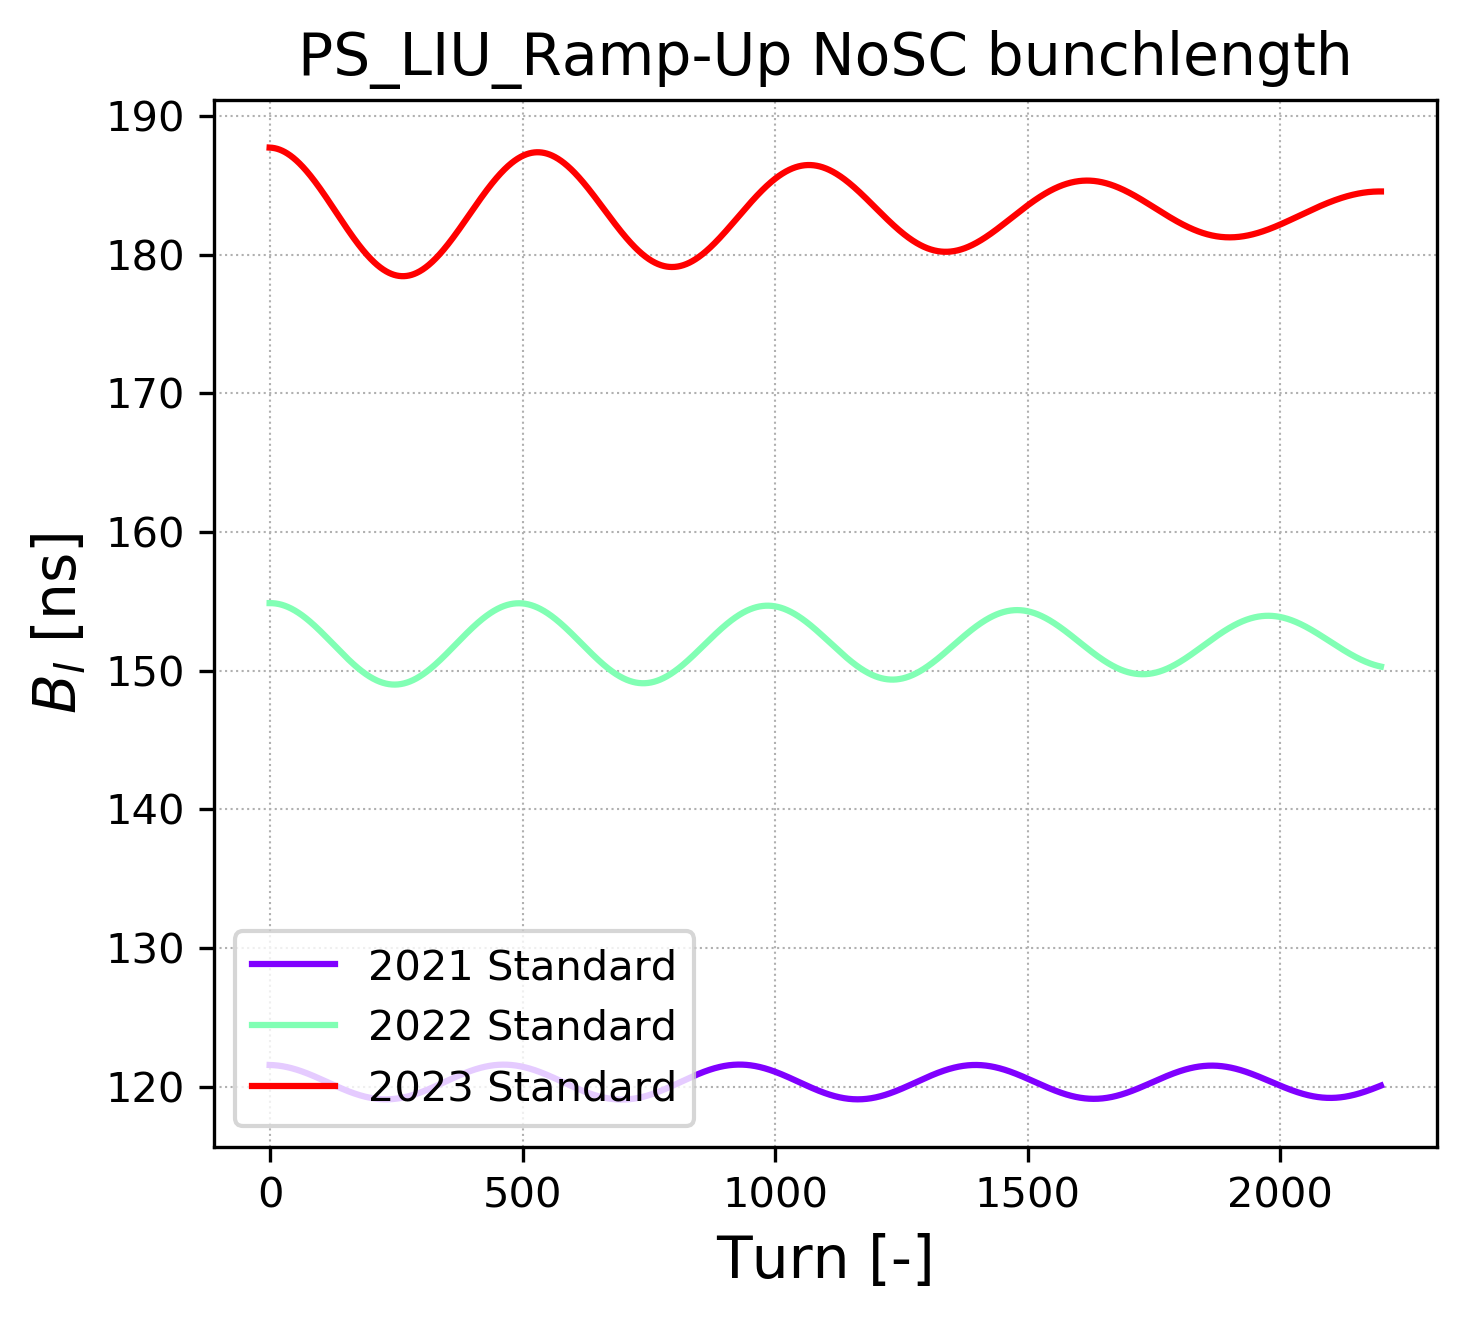

In [12]:
parameter = 'bunchlength'
multi = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

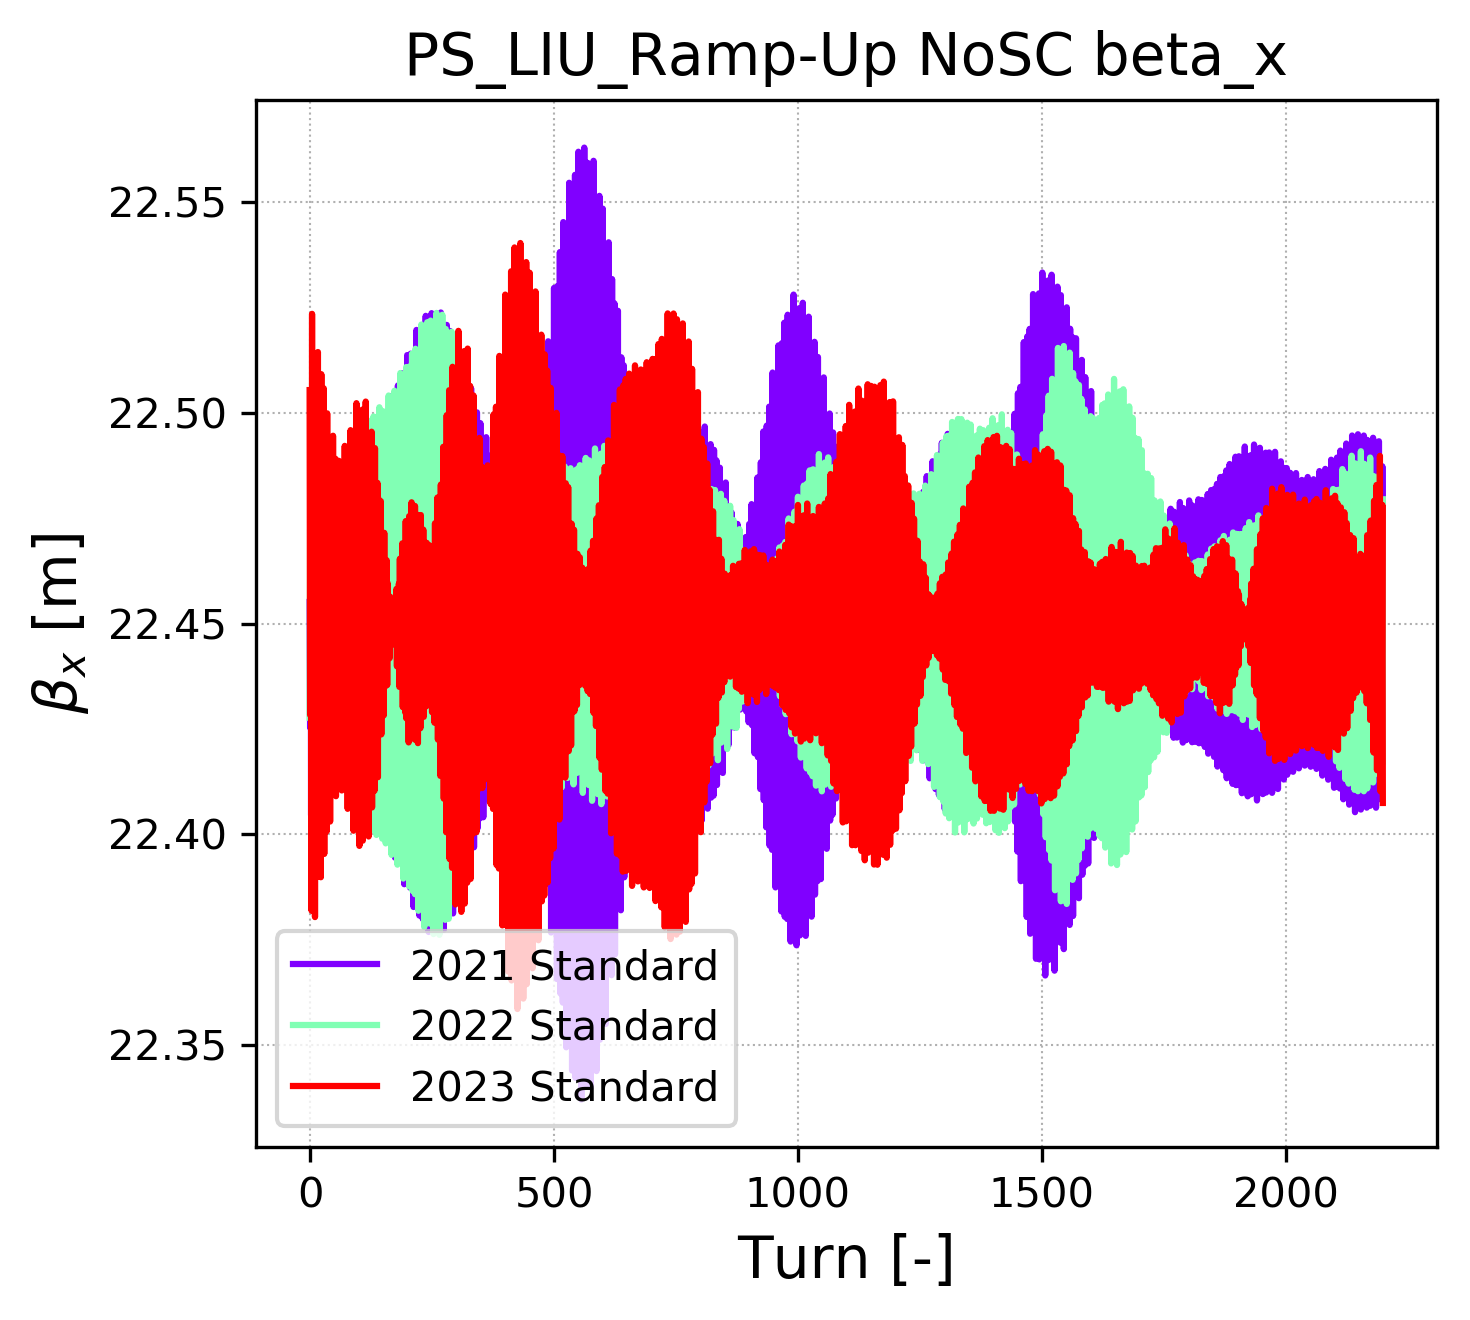

In [13]:
parameter = 'beta_x'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

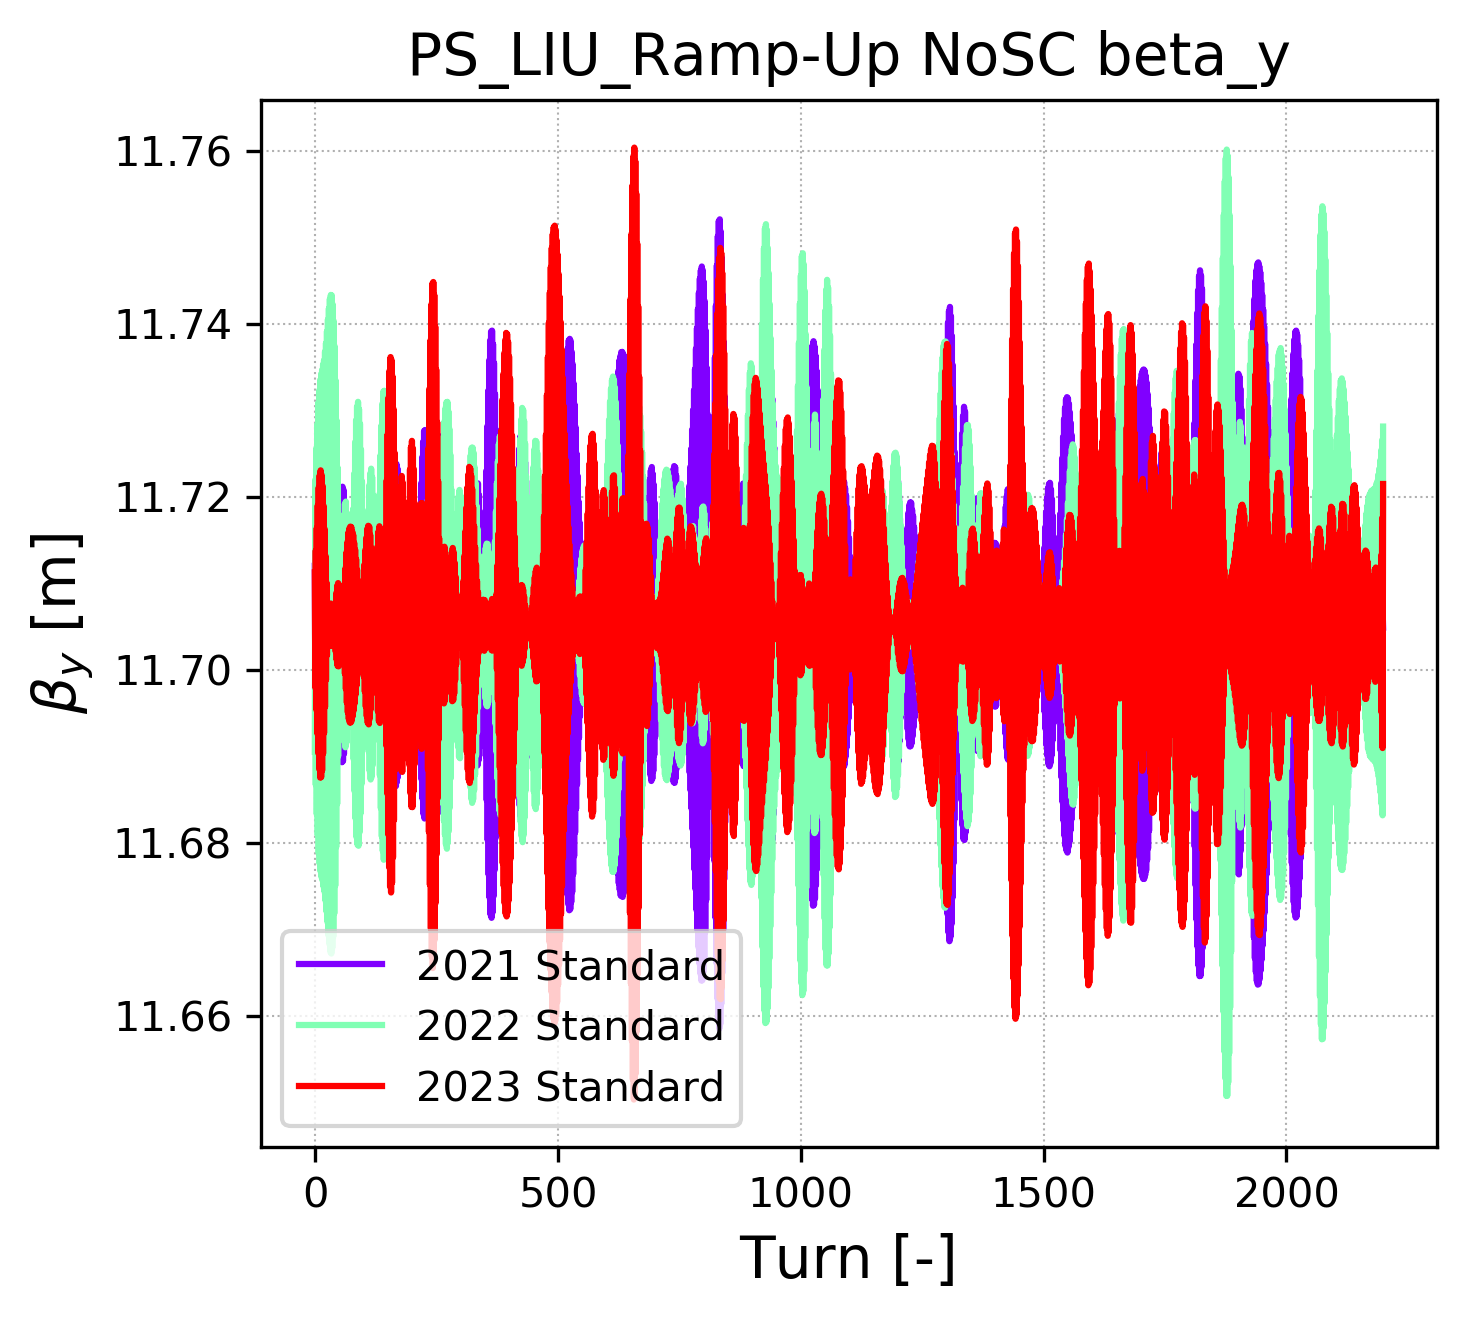

In [14]:
parameter = 'beta_y'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

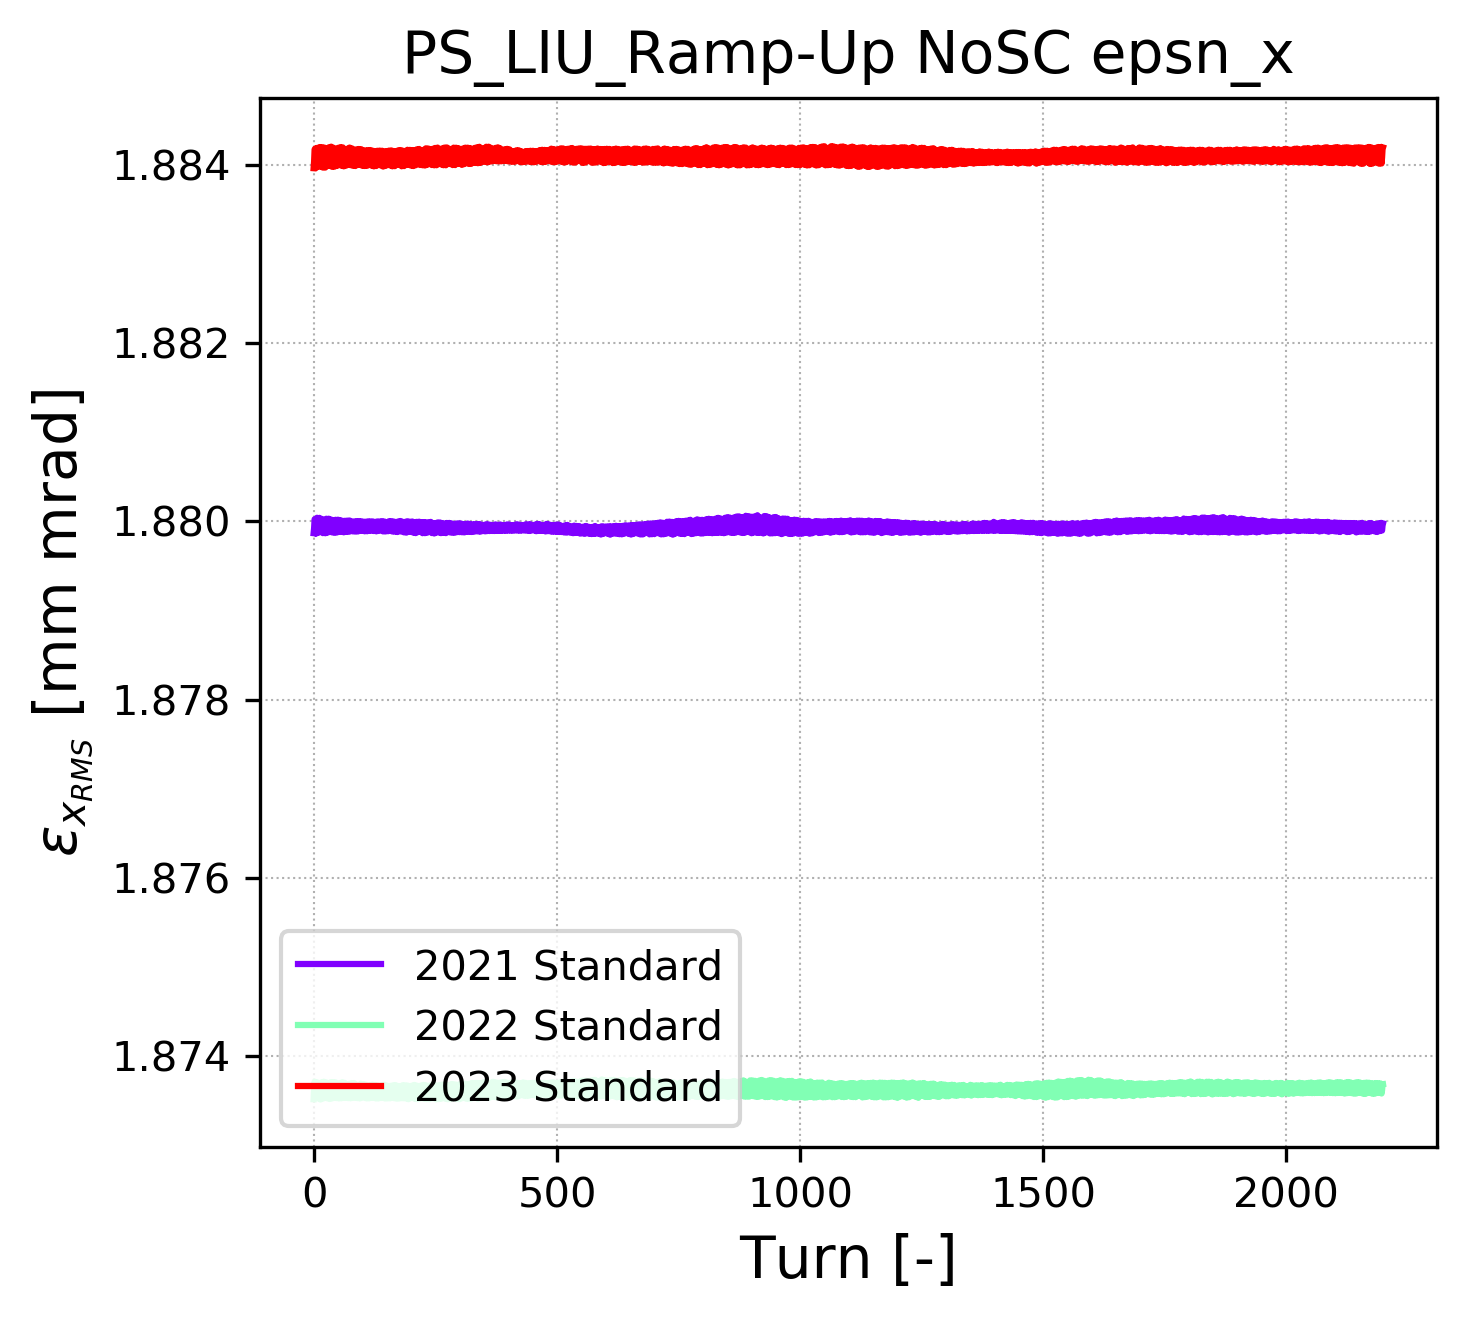

In [15]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

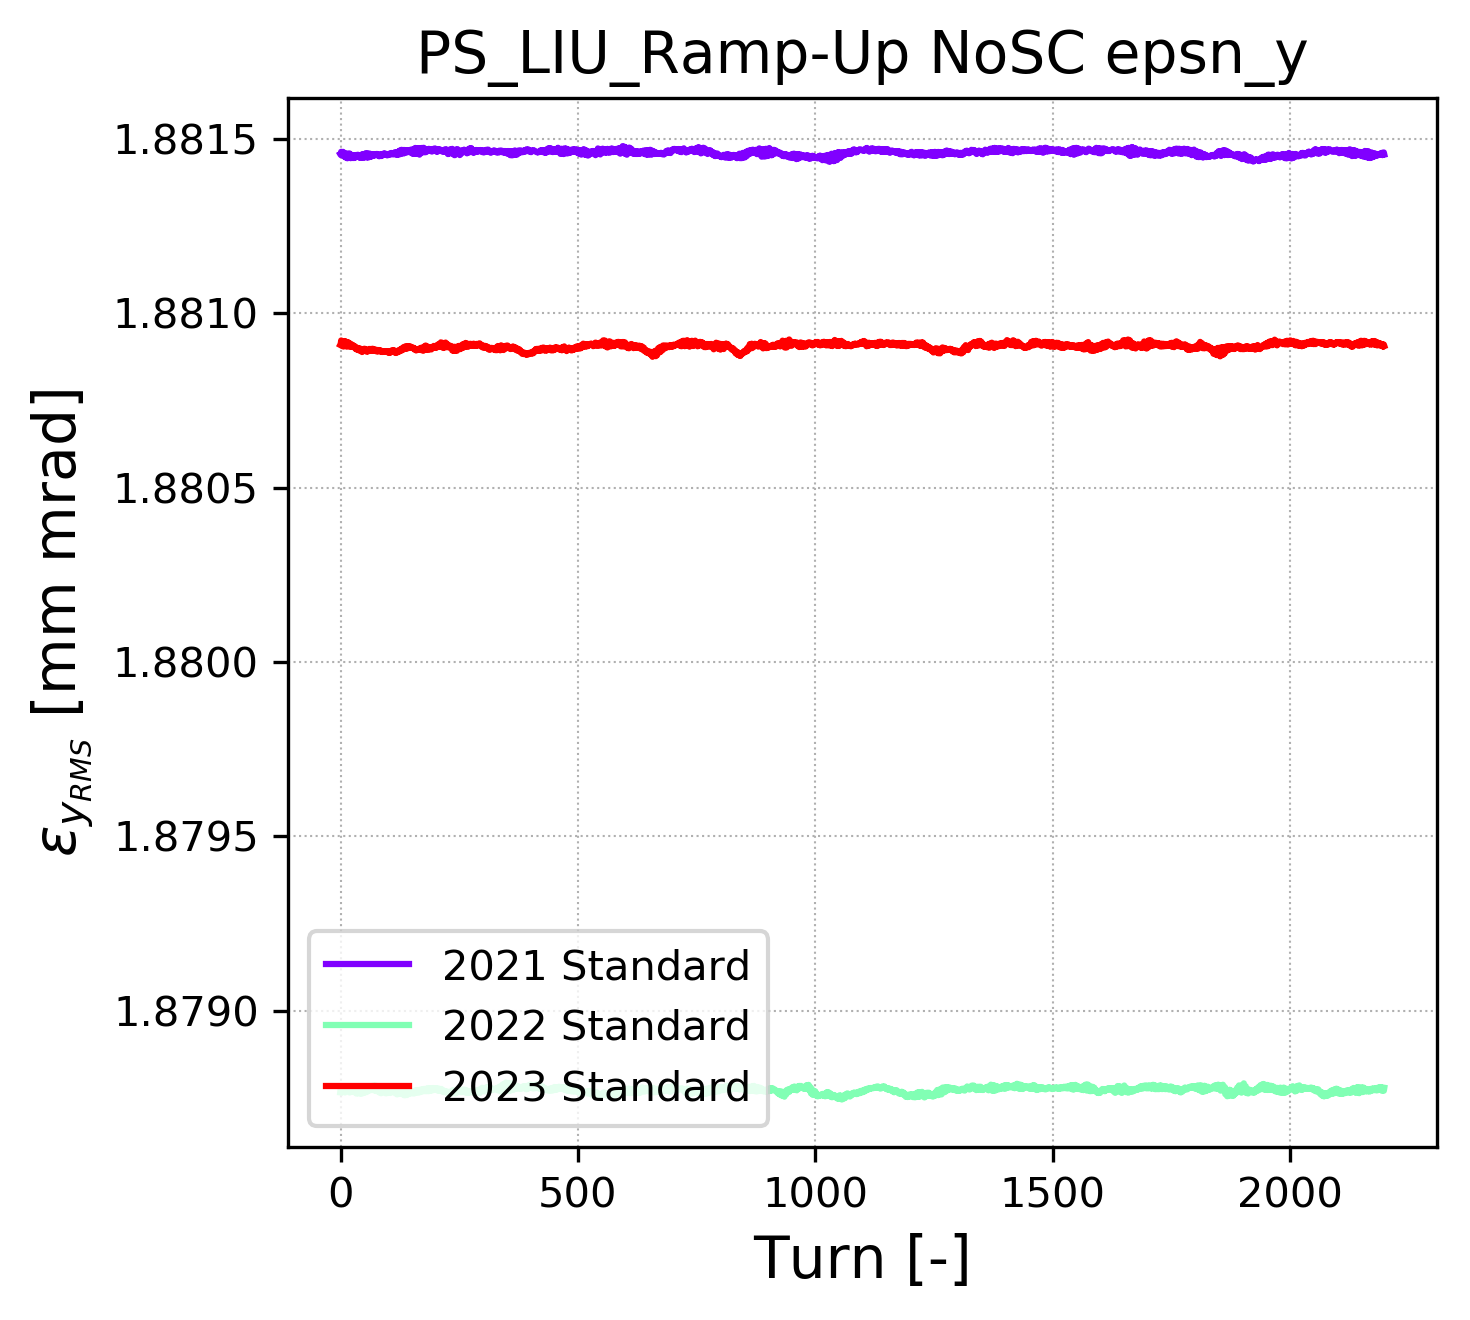

In [16]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

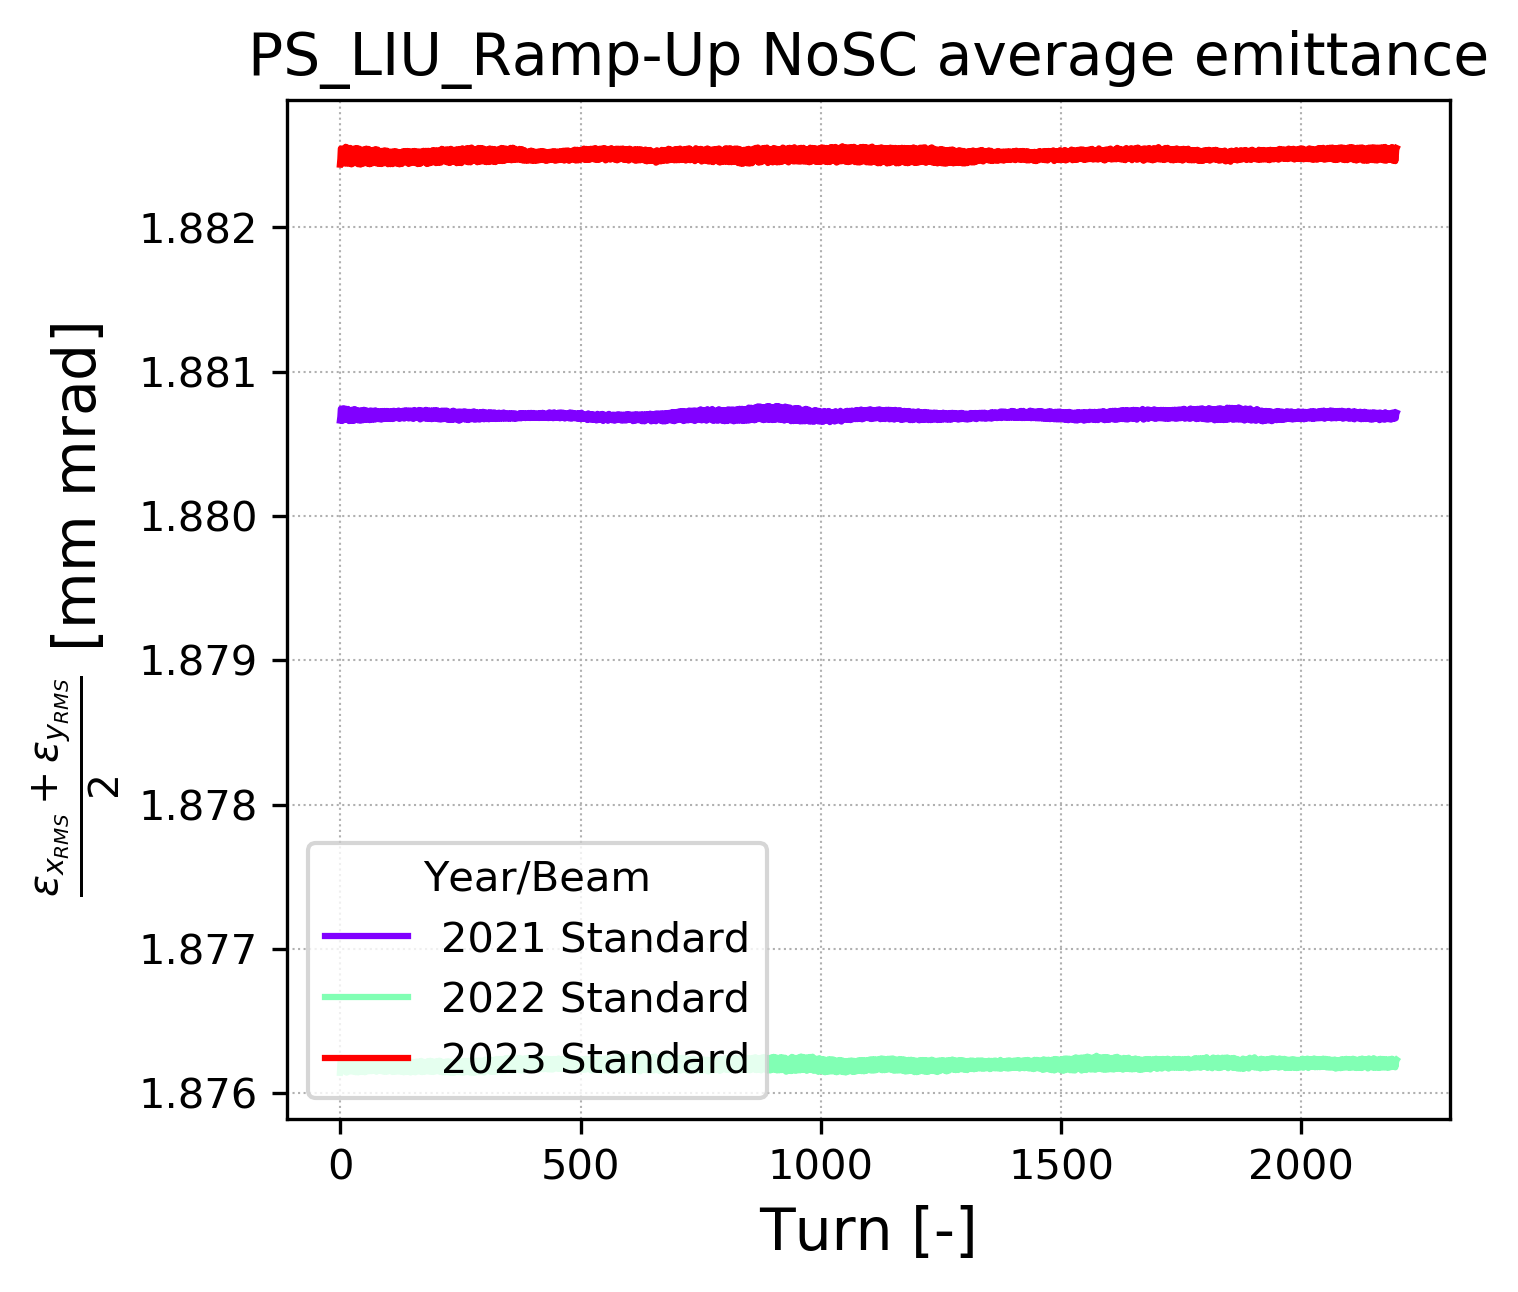

In [17]:
parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi1 = 1E6
multi2 = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' average emittance'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_{x_{RMS}} + \epsilon_{y_{RMS}}}{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], (dd[key][parameter1][0]*multi1 + dd[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=3, title=legend_label);
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot);

savename = save_folder + '/'+ main_label + '_epsn_av.png'
plt.savefig(savename, dpi = 800);

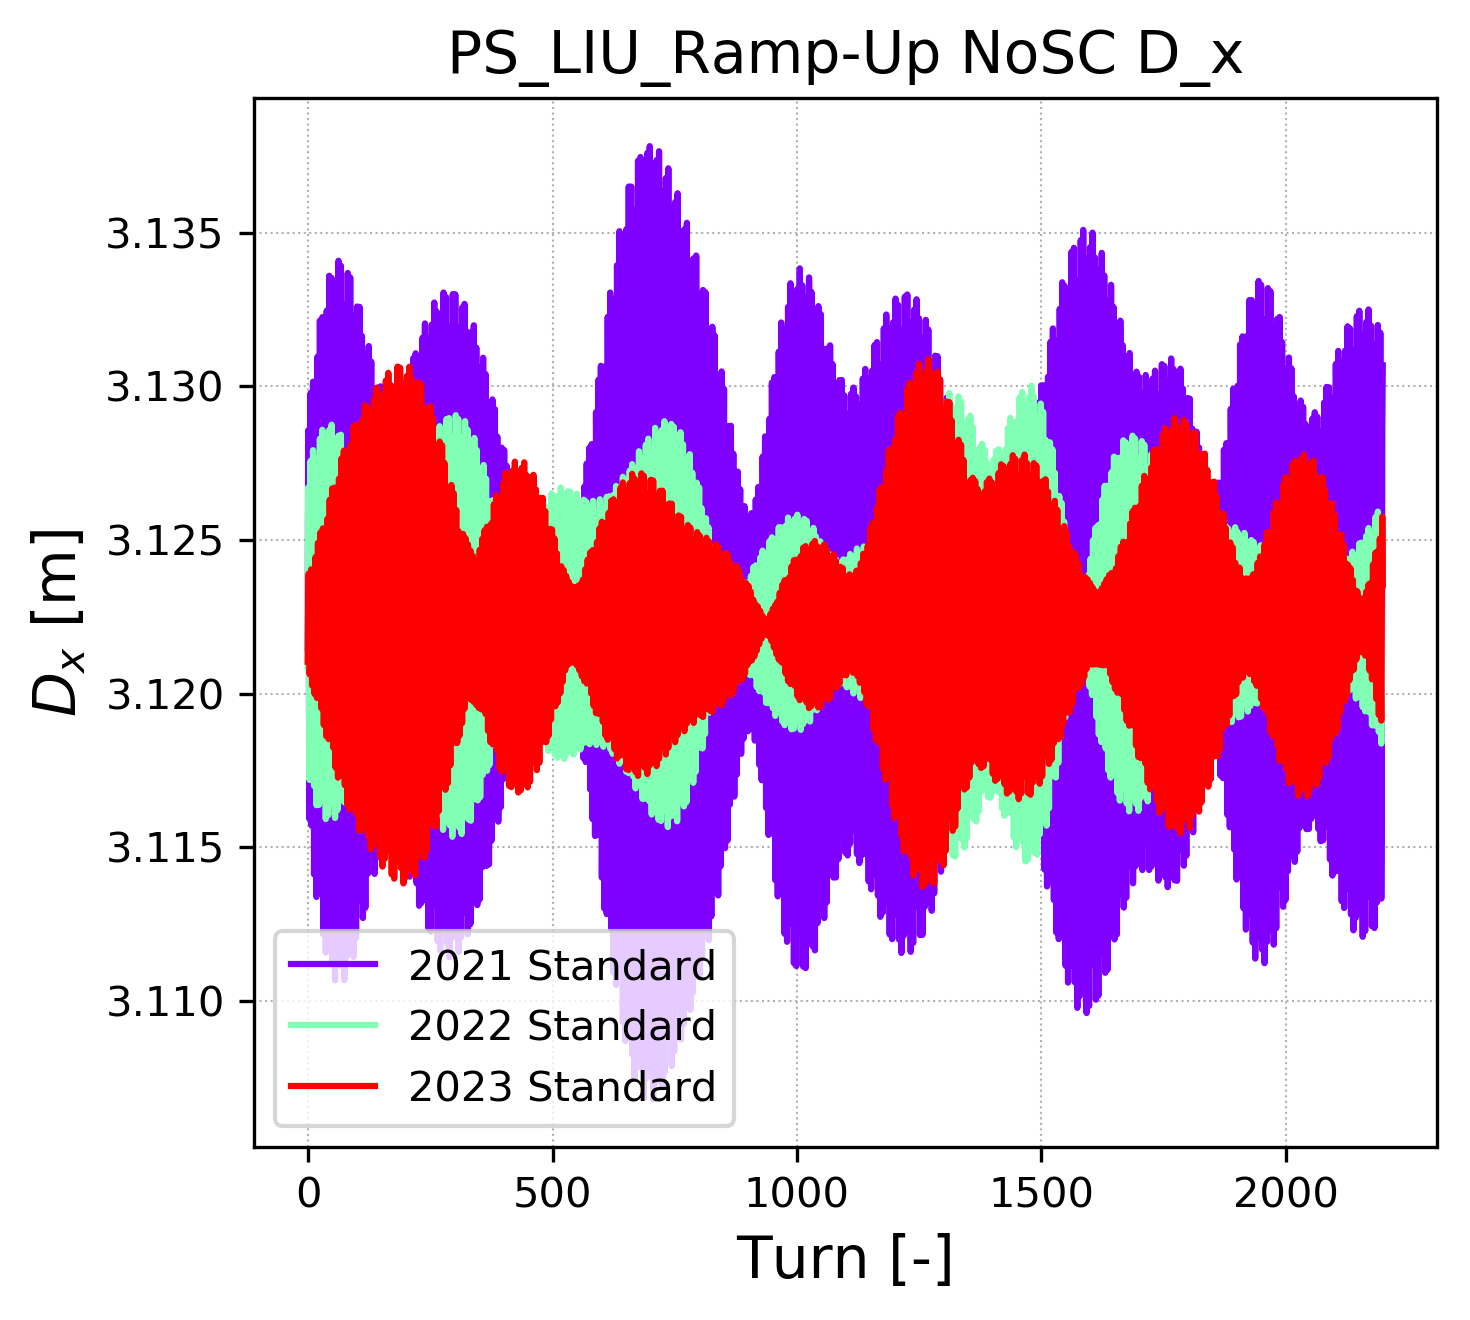

In [18]:
parameter = 'D_x'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

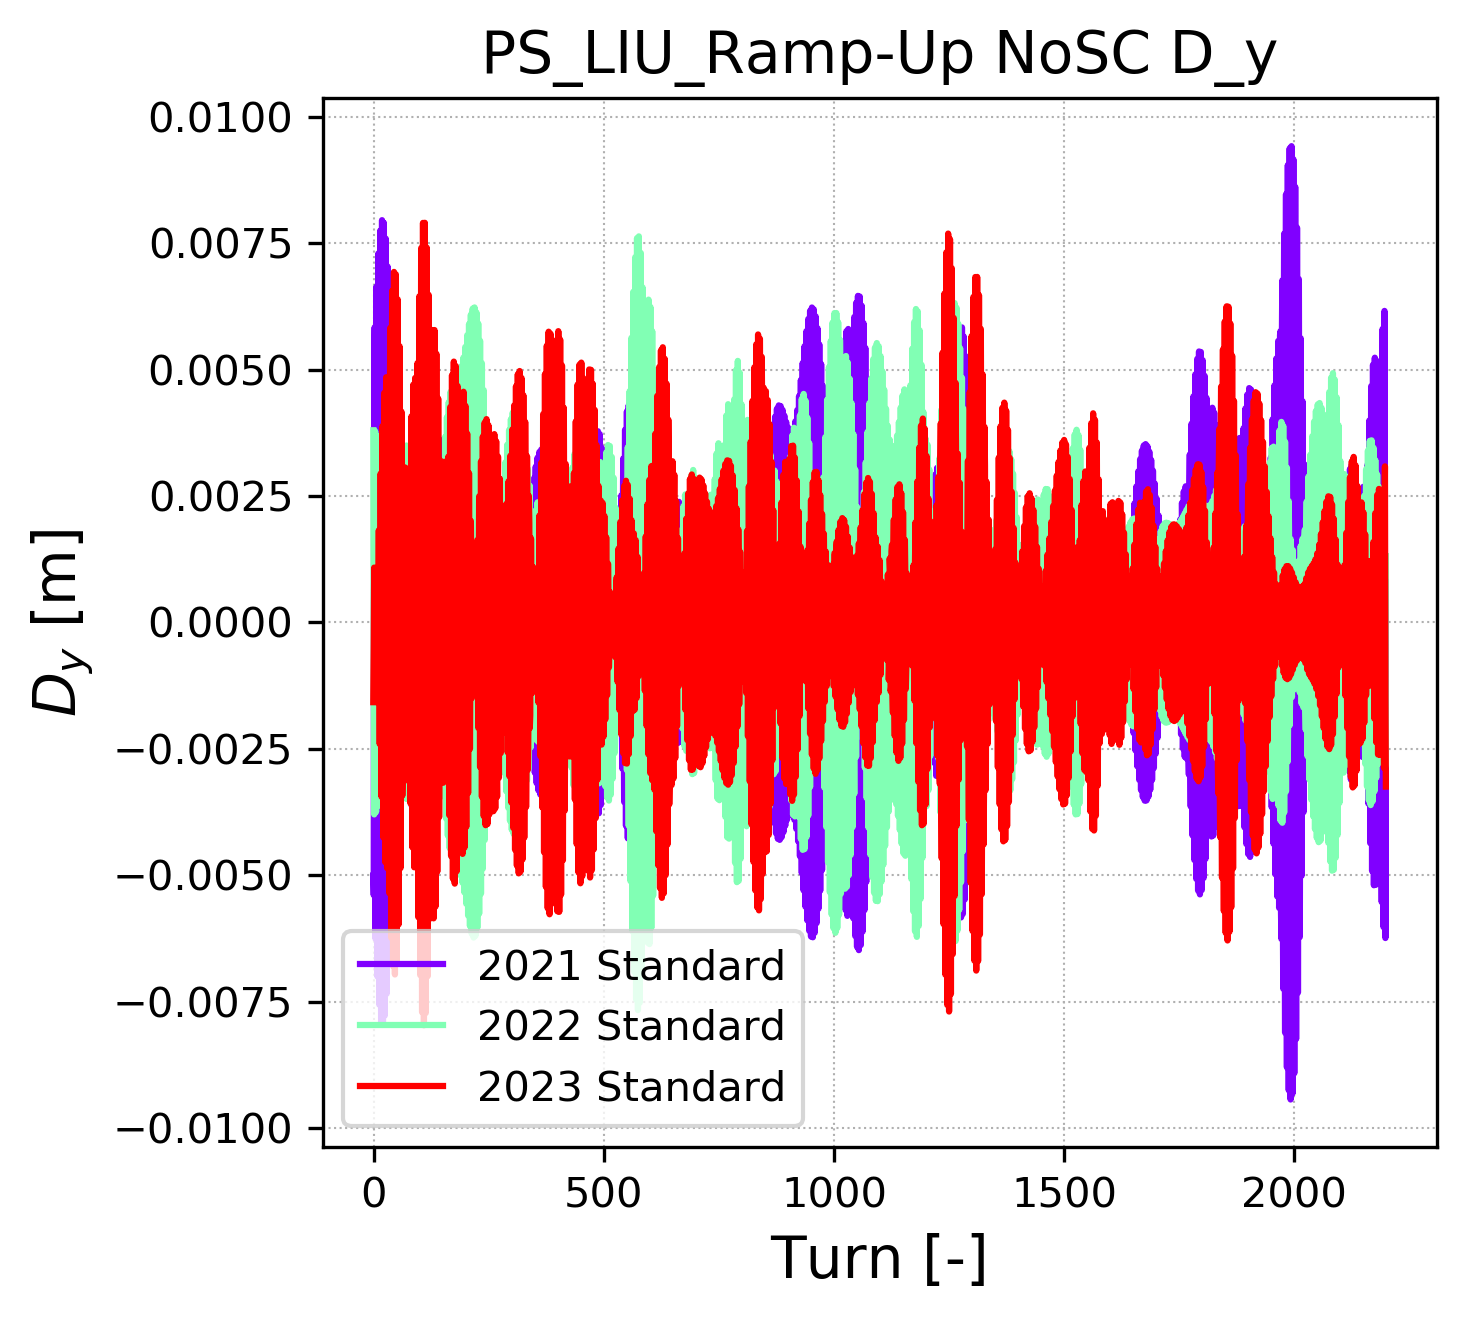

In [19]:
parameter = 'D_y'
multi = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
    ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi, label=key, color=colors[c_it]);
    c_it = c_it + 1;
        
ax1.legend(loc=3)
ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);